In [1]:
#working on writing useful functions to translate/examine HEK data output

import numpy as np
from shapely.geometry import Polygon, Point
from shapely import wkt
from sunpy.time import parse_time
import datetime
import os
from sunpy.net import hek
from sunpy.time import parse_time

In [2]:
#HEK exports certain data as unicode strings. Convert these strings to relevant, useful datatypes

def unicode2datetime(time_array):
    for i, elem in time_array:
        time_array[i] = parse_time(elem)
        
def unicode2polygon(bbox_array):
    if isinstance(bbox_array, basestring):
        bbox_array = wkt.loads(bbox_array)
    else:
        bbox_array = map(lambda x: wkt.loads(x), bbox_array)
#         for i, elem in bbox_array:
#             bbox_array[i] = wkt.loads(elem)
    return bbox_array

In [3]:
#function to determine whether 2 polygons overlap and, if so, in what manner they overlap.
#returns a list of booleans indicating different kinds of overlap 
#input parameters must both be shapely Polygons

def overlap(polygon1, polygon2):
    is_intersect = polygon1.intersects(polygon2)
    if is_intersect == False:
        is_crosses = False
        is_touches = False
        is_contained = False
        is_within = False
    else:
        is_crosses = polygon1.crosses(polygon2)
        is_touches = polygon1.touches(polygon2)
        is_contained = polygon1.contained(polygon2)
        is_within = polygon1.within(polygon2)
    return [is_intersect, is_crosses, is_touches, is_contained, is_within]

In [4]:
#function to determine the shortest distance between two preselected points on a sphere where we know 
#the radius of the sphere
#would be of use in calculating the distance between the centers of the flux emergence and flare
#nts: maybe change x,y inputs to be tuples later
def geodesic(centroid_1, centroid_2, r):
    x1 = centroid_1.x
    x2 = centroid_2.x
    y1 = centroid_1.y
    y2 = centroid_2.y
    chord = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    s = r*np.arcsin(chord/(2*r))
    return s

In [5]:
from shapely.geometry import Point

def point_with_z(x, y):
    r = 966
    z = (r**2 - x**2 - y**2)**(0.5)
    point = Point((x, y, z))
    return point

In [4]:
#assign labels to events
#will have to determine how to access num without directly inputting
#keep a global var? access 
def assign_label(event_type, num):
    label = event_type + str(num)

In [5]:
#function to find shortest distance separating two areas
def short_dis_areas(polygon1_area, polygon2_area): #r? will have to add a column for flare area as that's not a given
#account for normalization by looking at disk center?


SyntaxError: invalid syntax (<ipython-input-5-4267f98e1ba1>, line 2)

In [ ]:
#function removes/sythesizes dupiclate entries for the same event

In [9]:
#this function creates a sample data set from our merged "database" of flare events given parameters of start/stop 
#time, radial distance from center, and a minimum cutoff strength
#will have to translate flare strength classifications to numbers/something sortable

import numpy as np
import pandas as pd
import datetime
import csv

def pull_sample_flare(begin_year, begin_month, begin_day, end_year, end_month, end_day, max_dist_frm_center, 
                      min_strength):
    inputFile = 'flares_database.csv'
    flare_set = pd.read_csv(inputFile, delimiter = ',', header = 0)
    flare_set = flare_set.ix[flare_set['start_year']>=begin_year]
    flare_set = flare_set.ix[flare_set['stop_year']<=end_year]
    flare_set = flare_set.ix[flare_set['start_month']>=begin_month]
    flare_set = flare_set.ix[flare_set['stop_month']<=end_month]
    flare_set = flare_set.ix[flare_set['start_day']>=begin_day]
    flare_set = flare_set.ix[flare_set['stop_day']<=end_day]
    flare_set = flare_set.ix[flare_set['dist_frm_center']<=max_dist_frm_center]
    flare_set = flare_set.ix[flare_set['fl_peakflux']<=min_strength]
    return flare_set

def pull_sample_flare_1(inputFile, begin_time, end_time, max_dist_frm_center, min_strength):
    flare_set = pd.read_csv(inputFile, delimiter = ',', header = 0)
    flare_set['event_starttime'] = map(parse_time, flare_set['event_starttime'])
    flare_set['event_endtime'] = map(parse_time, flare_set['event_endtime'])
    flare_set = flare_set.ix[flare_set['event_starttime']>=begin_time]
    flare_set = flare_set.ix[flare_set['event_endtime']<=end_time]
#     flare_set = flare_set.ix[flare_set['dist_frm_center']<=max_dist_frm_center]
    flare_set = flare_set.ix[flare_set['fl_peakflux']>=min_strength]
    return flare_set

# begin_time = parse_time('2014-01-01T02:34:30')
# end_time = parse_time('2014-01-21T02:34:30')
# max_d = 100.0
# min_strength = 100.0



In [10]:
inputFile = 'look_at_ef_data.csv'

def pull_sample_ef(inputFile, begin_time, end_time, delta_t):
    ef_set = pd.read_csv(inputFile, delimiter = ',', header = 0)
    ef_set['event_starttime'] = map(parse_time, ef_set['event_starttime'])
    ef_set['event_endtime'] = map(parse_time, ef_set['event_endtime'])
    ef_set = ef_set.ix[ef_set['event_starttime']>=(begin_time-delta_t)]
    ef_set = ef_set.ix[ef_set['event_endtime']<=(end_time-delta_t)]
    ef_set = ef_set.rename(columns={'event_starttime': 'ef_starttime', 'event_endtime': 'ef_endtime',
                                    'hpc_bbox': 'ef_hpc_bbox', 'hpc_coord': 'ef_hpc_coord',
                                    'hpc_radius': 'ef_hpc_radius','hpc_x' : 'ef_hpc_x','hpc_y': 'ef_hpc_y', 
                                    'SOL_standard' : 'ef_SOL_standard'})
    return ef_set
# begin_time = parse_time('2014-01-01T02:34:30')
# end_time = parse_time('2014-01-21T02:34:30')
# delta_t=datetime.timedelta(hours = 0, minutes = 30, seconds = 0)

# pull_sample_ef(inputFile, begin_time, end_time, delta_t)


In [ ]:
def pull_sample_CME(inputFile, begin_time, end_time, delta_t):
    cme_set = pd.read_csv(inputFile, delimiter = ',', header = 0)
    cme_set['event_starttime'] = map(parse_time, cme_set['event_starttime'])
    cme_set['event_endtime'] = map(parse_time, cme_set['event_endtime'])
    cme_set = cme_set.ix[cme_set['event_starttime']>=(begin_time-delta_t)]
    cme_set = cme_set.ix[cme_set['event_endtime']<=(end_time-delta_t)]

    return cme_set

In [9]:
def pull_sample(inputFile, begin_time, end_time, delta_t):
    df = pd.read_csv(inputFile, delimiter = ',', header = 0)
    df['event_starttime'] = map(parse_time, df['event_starttime'])
    df['event_endtime'] = map(parse_time, df['event_endtime'])
    df = df.ix[df['event_starttime']>=(begin_time-delta_t)]
    df = df.ix[df['event_endtime']<=(end_time-delta_t)]

    return df

In [ ]:
def spatial_flux_check(flare_poly, ef_poly, spatial_sep, df, index):
    if geodesic(flare_poly.centroid, ef_poly.centroid)<= spatial_sep:
        return df['indentifier'][index]

In [29]:
#function to determine whether a flare corresponds with a flux emergence

def associate_ef(inputFile_fl, inputFile_ef, begin_year, begin_month, begin_day, end_year, end_month, end_day, 
                 max_dist_frm_center, min_strength, temporal_sep_hr, temporal_sep_min, temporal_sep_sec, spatial_sep, 
                 output2file=False, out_file = None):
    delta_t = datetime.timedelta(hours = temporal_sep_hr, minutes = temporal_sep_min, seconds = temporal_sep_sec)
    begin_time = datetime.datetime(begin_year, begin_month, begin_day)
    end_time = datetime.datetime(end_year, end_month, end_day) 

    flare_set = pull_sample_flare_1(inputFile_fl, begin_time, end_time, max_dist_frm_center, min_strength)
    ef_set = pull_sample_ef(inputFile_ef, begin_time, end_time, delta_t)
    r = 966
    length = flare_set.shape[0]
    zeroes = [0 for i in range(length)]
    flare_set.loc[:, 'associated_ef'] = zeroes
    ef_keywords = list(np.genfromtxt('keywords_ef_append_fl.csv', delimiter=',', dtype=str))
    for elem in ef_keywords:
        flare_set.loc[:, elem] = zeroes
    to_be_deleted = []
    idx = flare_set['event_starttime'].index.tolist()
    idx_last = idx[-1]
    flare_set['event_starttime'] = map(parse_time, flare_set['event_starttime'])
    flare_set['event_endtime'] = map(parse_time, flare_set['event_endtime'])
    i = -1
    for elem in flare_set['event_starttime']:
        i += 1
        print '%d / %d events' %((i+1), length)
        start_ef = elem-delta_t
        ef_search = ef_set.ix[ef_set['ef_endtime']>=start_ef]
        ef_search = ef_search.ix[ef_search['ef_endtime']<=elem]
        num_associated_ef = 0
        if ef_search.empty == False:
            fl_point = Point((flare_set['hpc_x'].values[i], flare_set['hpc_y'].values[i]))
            #keep in mind, Point in HPC units 
            if ef_search.shape[0] == 1:
                ef_poly = wkt.loads(ef_search['ef_hpc_bbox'].values[0])
                chord = fl_point.distance(ef_poly)
                s = r*np.arcsin(chord/(2*r))
                if s <= spatial_sep:
                    flare_set['associated_ef'] = ef_search['ef_SOL_standard'].values[0]
                    for elem in ef_keywords:
                        flare_set.loc[idx[i], elem] = ef_search[elem].values[0]
                    num_associated_ef+=1 
            else:
                ef_search['ef_hpc_bbox'] = unicode2polygon(ef_search['ef_hpc_bbox'])
                j = 0
                listOindices = []
                for elem in ef_search['ef_hpc_bbox'].values:
                    chord = fl_point.distance(elem)
                    s = r*np.arcsin(chord/(2*r))
                    if s <= spatial_sep:
                        num_associated_ef+=1 
                        listOindices.append(j)
                    j+=1
                if num_associated_ef >= 1:
                    has_multiple_ef = 1
                    for index in listOindices:
                        new_row = flare_set.iloc[i, :]
                        to_be_deleted.append(idx[i])
                        new_row['associated_ef'] = ef_search['ef_SOL_standard'].values[index]
                        for elem in ef_keywords:
                            new_row[elem] = ef_search[elem].values[index]
                        idx_last +=1
                        flare_set.loc[idx_last, :] = new_row
#                         flare_set = pd.concat([flare_set,new_row], ignore_index=True)
                        
    k = 0
    is_ef = [0 for i in range(flare_set.shape[0])]
    for elem in flare_set['associated_ef']:
        if elem!=0:
            is_ef[k] = 1
        k+=1
    flare_set.loc[:, 'is_ef'] = is_ef
    to_be_deleted = set(to_be_deleted)
    flare_set = flare_set.drop(to_be_deleted)
    flare_set = flare_set.sort_values('SOL_standard')
    
    if output2file == True:
        if out_file == None:
             out_file = ('flare_search_'+str(begin_time)+'_'+ str(end_time)+'_'+str(max_dist_frm_center)+
                         '_'+str(min_strength)+'.csv')
        flare_keywords = list(np.genfromtxt('keywords_flare.csv', delimiter=',', dtype=str))
        flare_keywords.extend(['is_ef','associated_ef'])
        flare_keywords.extend(ef_keywords)

        flare_set.to_csv(path_or_buf=out_file, columns = flare_keywords, index = False)
        
    return flare_set   
        
# associate_ef('look_at_flare_data.csv', 'look_at_ef_data.csv', 2014, 1, 6, 2014, 1, 7, 60, 300, 10, 0, 0, 50, 
#              output2file=True, out_file = None)  

In [ ]:
def associate_event(inputFile, begin_year, begin_month, begin_day, end_year, end_month, end_day, max_dist_frm_center, 
                 min_strength, temporal_sep_hr, temporal_sep_min, temporal_sep_sec, spatial_sep, output2file=False, 
                 out_file = None, post_flare = False):
    delta_t = datetime.timedelta(hours = temporal_sep_hr, minutes = temporal_sep_min, seconds = temporal_sep_sec)
    begin_time = datetime.datetime(begin_year, begin_month, begin_day)
    end_time = datetime.datetime(end_year, end_month, end_day) 
    flare_set = pull_sample_flare_1(begin_time, end_time, max_dist_frm_center, min_strength)
    event_set = pull_sample(inputFile, begin_time, end_time, delta_t)
    r = 966
    
    is_event = [0 for i in range(flare_set.shape[0])]
    associated_event = []
    i = -1
    for elem in flare_set['event_starttime']:
        i += 1
        if post: 
            end_event = elem+delta_t
            event_search = event_set.ix[event_set['event_endtime']>=elem]
            event_search = event_search.ix[event_search['event_endtime']<=end_event]  
        else:
            start_event = elem-delta_t
            event_search = event_set.ix[event_set['event_endtime']>=start_event]
            event_search = event_search.ix[event_search['event_endtime']<=elem]
        if event_search.empty == False:
            fl_point = Point((flare_set['hpc_x'].values[i], flare_set['hpc_y'].values[i]))
            #keep in mind, Point in HPC units 
            good_event = []
            if event_search.shape[0] == 1:
                event_poly = wkt.loads(event_search['hpc_bbox'].values[0])
                chord = fl_point.distance(event_poly)
                s = r*np.arcsin(chord/(2*r))
                if s <= spatial_sep:
                    good_event.append(event_search['SOL_standard'].values[0])
                else: good_event = [0]
            else:
                event_search['hpc_bbox'] = unicode2polygon(event_search['hpc_bbox'])
                j = 0
                found_event = False
                for elem in event_search['hpc_bbox'].values:
                    chord = fl_point.distance(elem)
                    s = r*np.arcsin(chord/(2*r))
                    if s <= spatial_sep:
                        good_event.append(event_search['SOL_standard'].values[j])   
                        found_event = True
                    j+=1
                if found_event == False: good_event = [0]
        else: good_event = [0]
        associated_event.append(good_event)
    k = 0
    for elem in associated_event:
        if elem!=[0]:
            is_event[k] = 1
        k+=1
    flare_set.loc[:, 'is_event'] = is_event
    flare_set.loc[:, 'associated_event'] = associated_event
    
    if output2file:
        if out_file == None:
             out_file = ('flare_search_'+str(begin_time)+'_'+ str(end_time)+'_'+str(max_dist_from_center)+
                         '_'+str(min_strength)+'.csv')
        flare_keywords = list(np.genfromtxt('flare_keywords.csv', delimiter=',', dtype=str))
        flare_keywords.extend(['is_event','associated_event'])

        flare_set.to_csv(path_or_buf=out_file, columns = flare_keywords, index = False)
        
    return flare_set   

In [ ]:
#original middle sequence for ff

for elem in flare_set['event_starttime']:
        i += 1
        start_ef = elem-delta_t
        ef_search = ef_set.ix[ef_set['event_endtime']>=start_ef]
        ef_search = ef_search.ix[ef_search['event_endtime']<=elem]
        if ef_search.empty == False:
            fl_hpc_bbox = np.array(flare_set['hpc_bbox'])
            flare_poly = wkt.loads(fl_hpc_bbox[i])
            good_ef = []
            if ef_search.shape[0] == 1:
                ef_poly = wkt.loads(ef_search['hpc_bbox'].values[0])
                if geodesic(flare_poly.centroid, ef_poly.centroid, 966)<= spatial_sep:
                    good_ef.append(ef_search['SOL_standard'].values[0])
                else: good_ef = [0]
            else:
                ef_search['hpc_bbox'] = unicode2polygon(ef_search['hpc_bbox'])
                j = 0
                for elem in ef_search['hpc_bbox'].values:
                    if geodesic(flare_poly.centroid, elem.centroid, 966)<= spatial_sep:
                        good_ef.append(ef_search['SOL_standard'].values[j])
                    j+=1
                    else: good_ef = [0]
        else: good_ef = [0]
        associated_ef.append(good_ef)

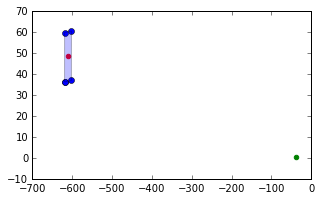

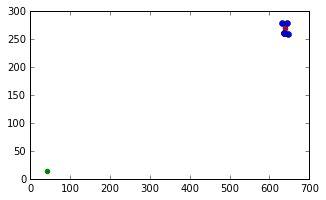

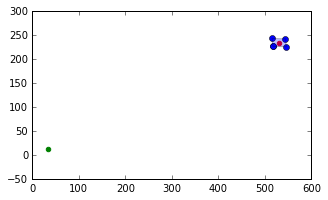

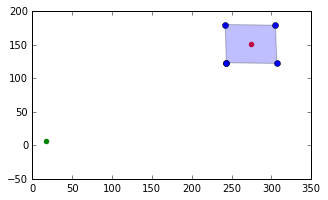

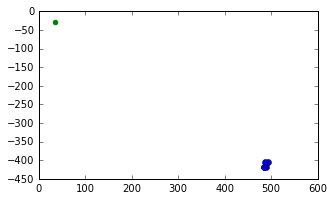

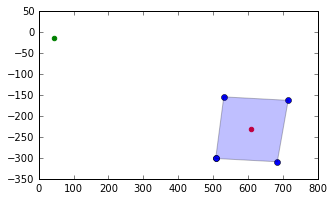

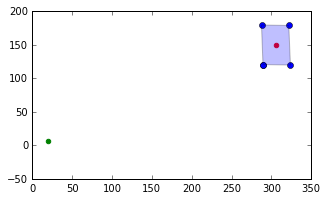

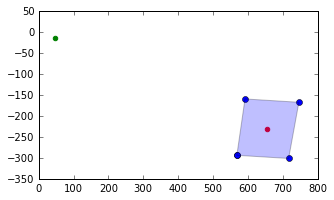

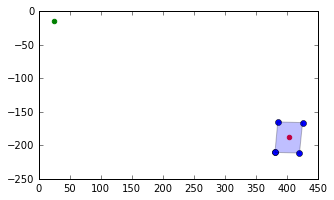

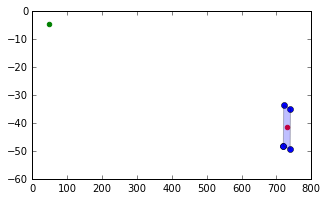

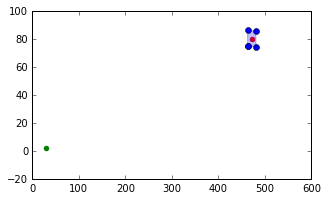

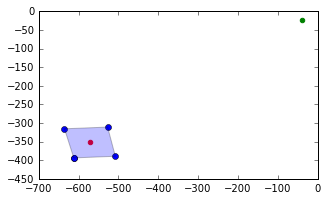

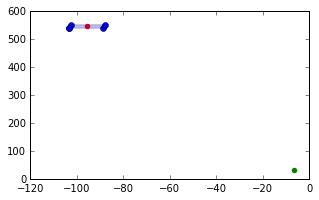

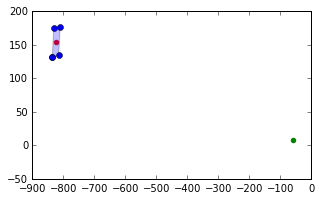

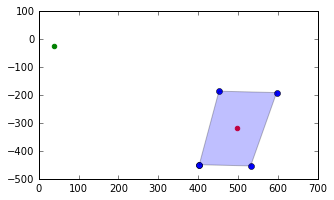

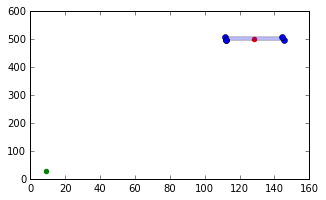

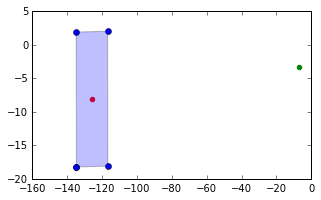

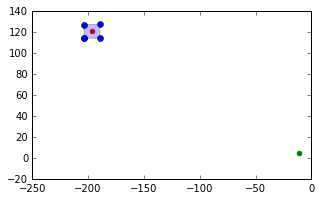

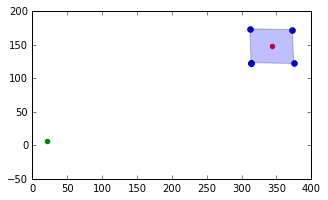

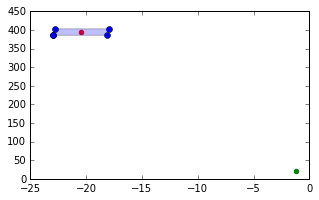

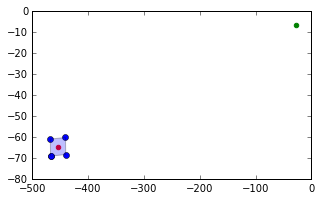

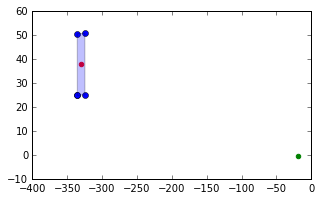

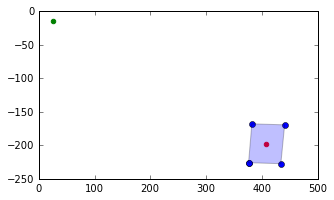

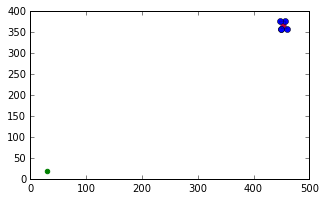

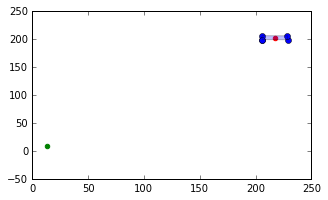

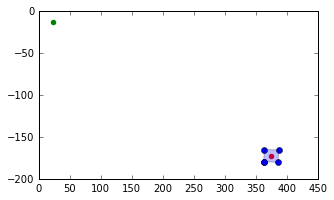

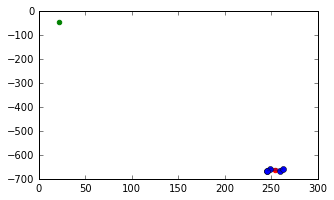

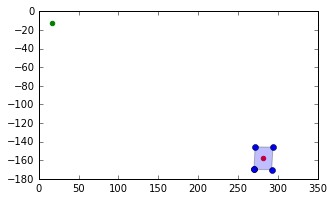

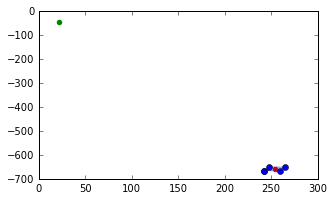

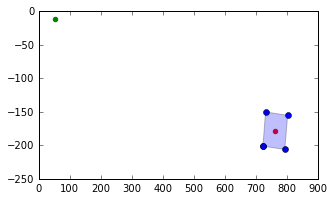

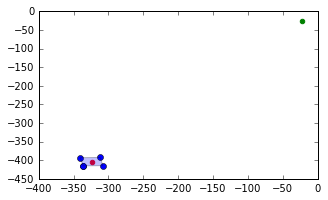

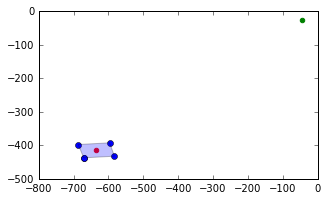

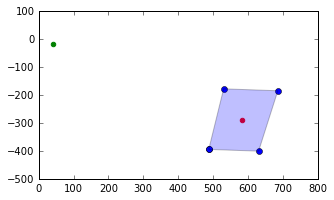

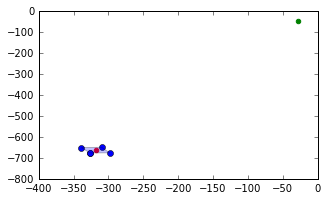

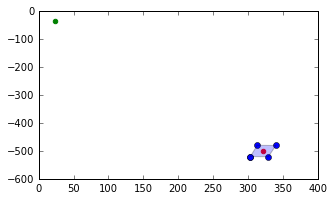

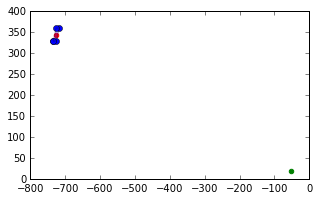

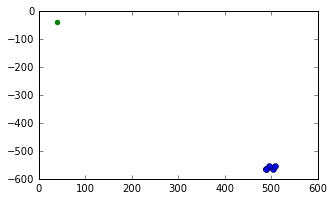

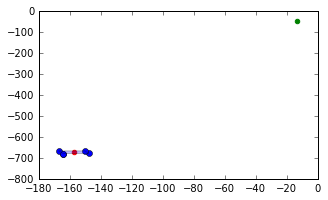

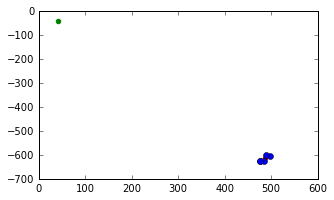

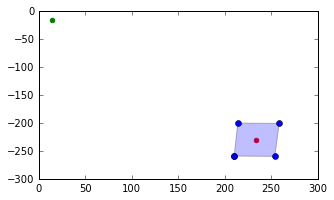

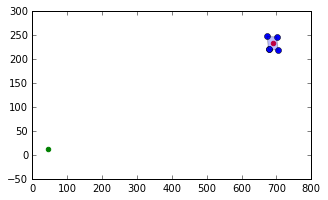

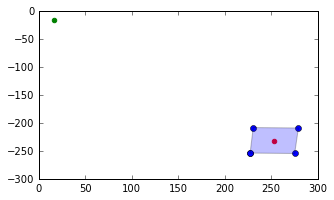

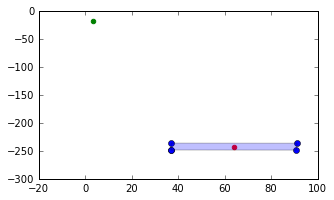

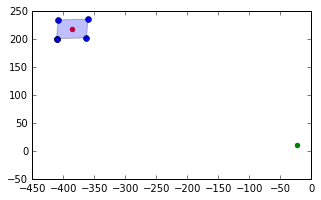

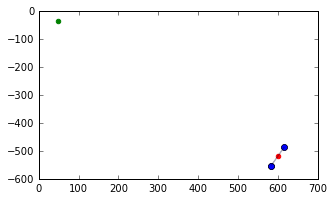

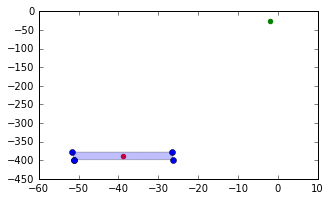

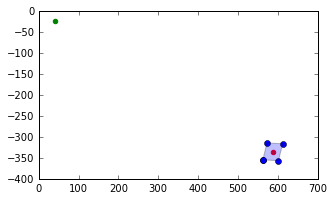

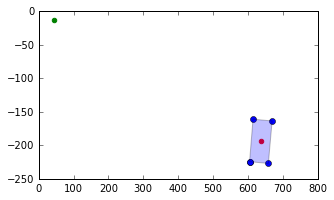

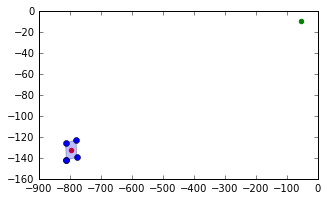

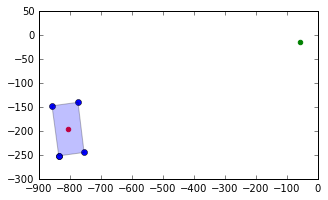

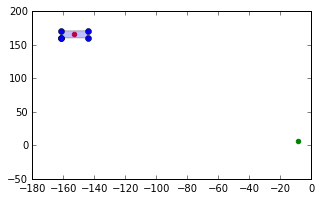

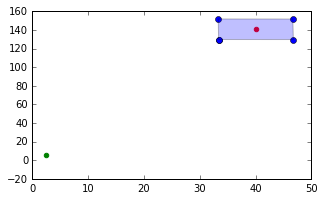

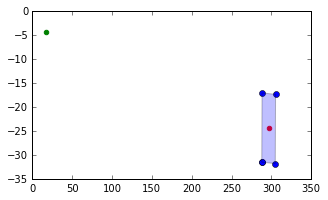

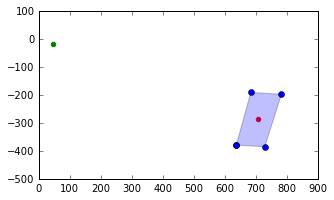

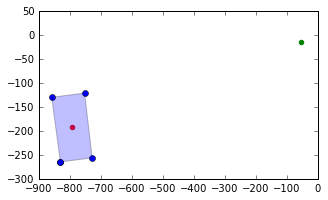

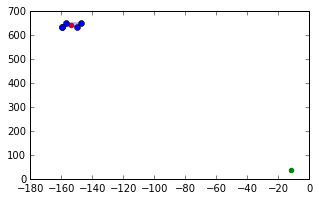

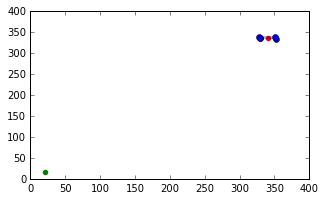

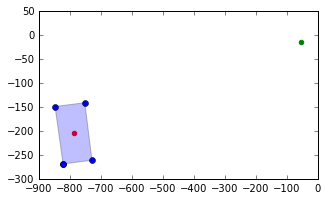

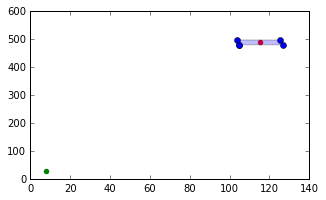

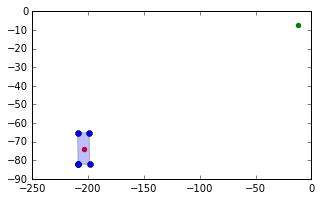

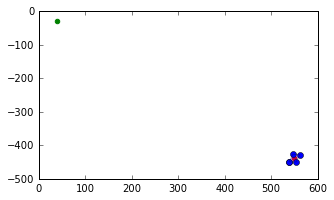

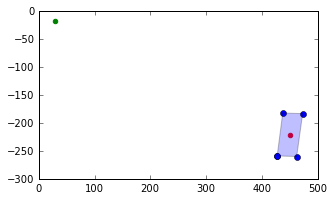

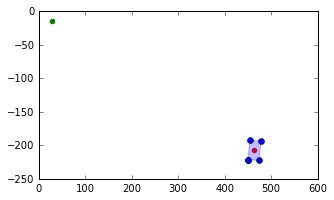

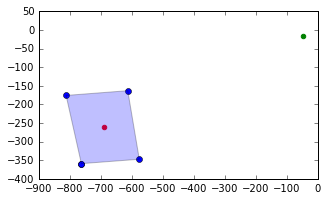

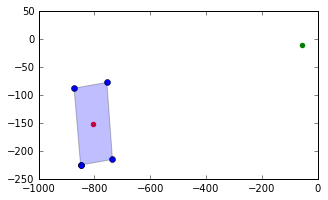

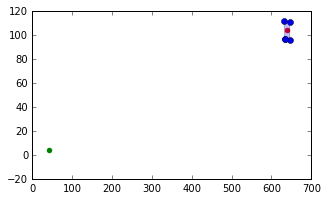

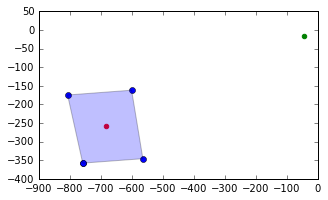

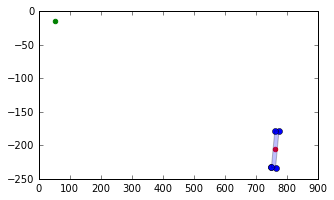

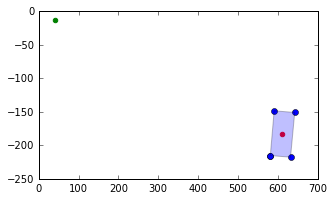

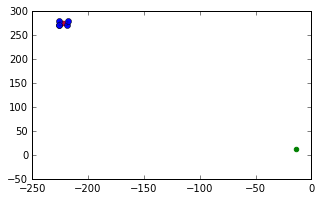

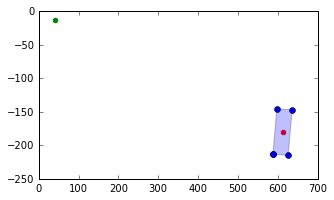

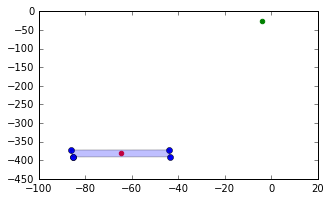

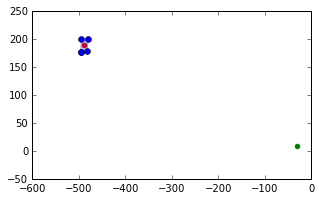

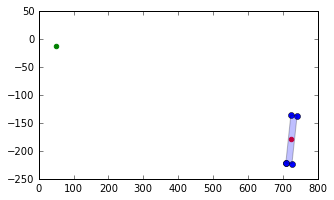

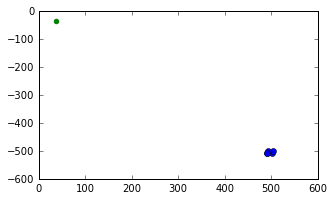

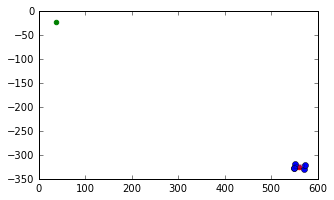

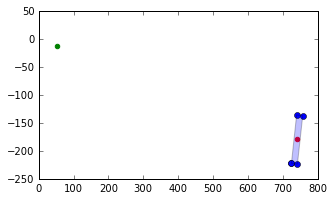

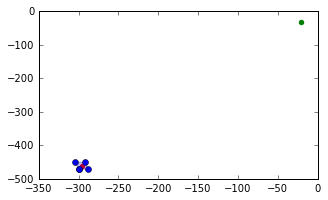

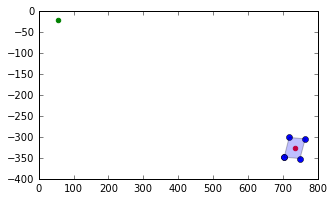

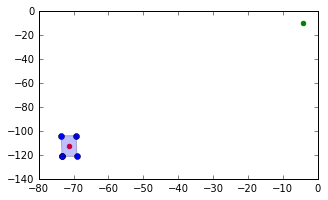

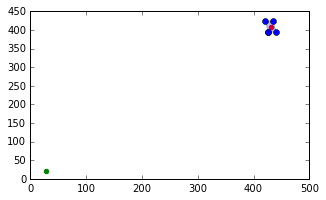

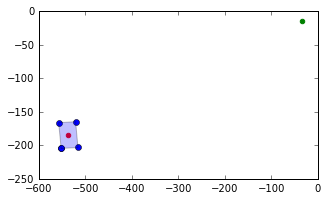

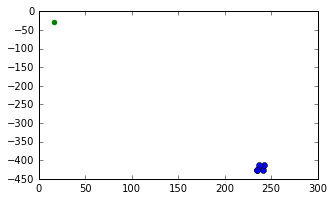

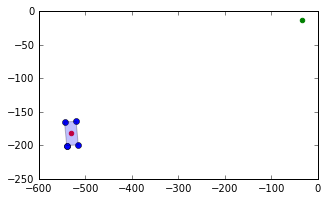

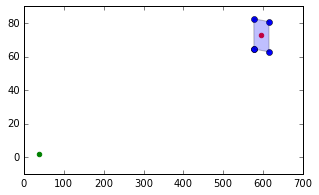

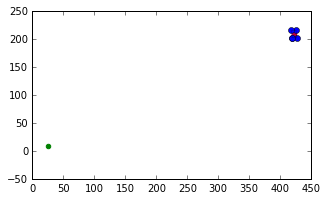

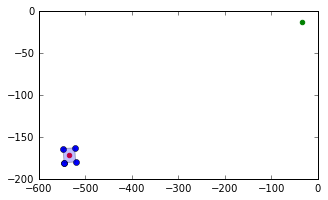

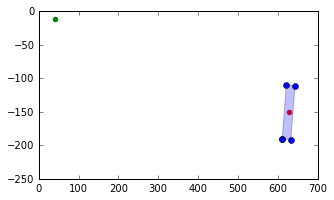

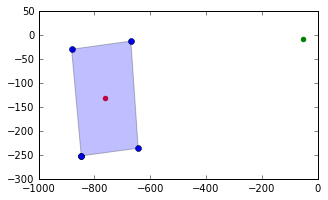

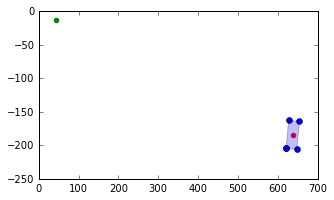

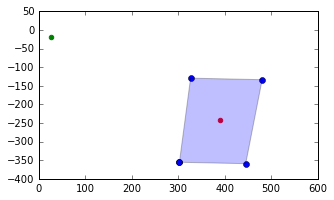

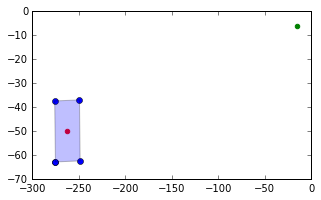

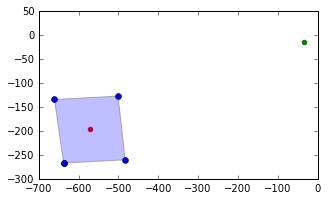

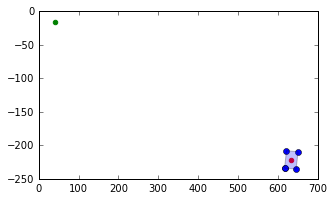

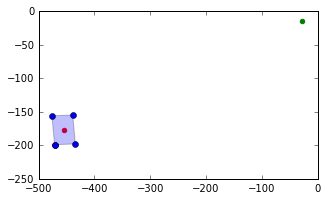

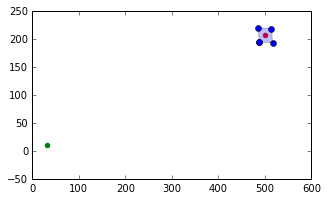

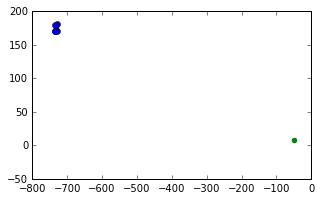

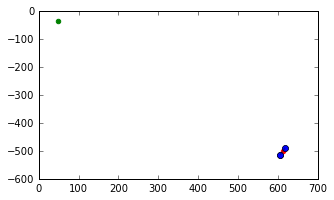

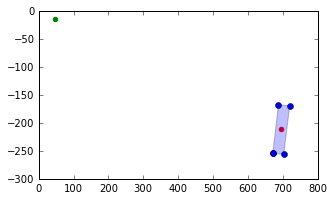

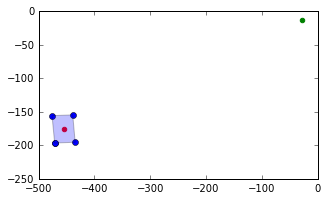

In [24]:
#visualize polygon given by HEK with polygon's centriod and HEK's mean coordinates
%matplotlib inline

import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import pandas as pd
import numpy as np
from shapely import wkt


inputFile = 'look_at_ef_data.csv'

flare_set = pd.read_csv(inputFile, delimiter = ',', header = 0)

fl_hpc_bbox = np.array(flare_set['hpc_bbox'])

def plot_coords(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, 'o', zorder=1)

for i in range(100):
    fig = plt.figure(figsize=(5,3))
    ax = fig.add_subplot(111)
    flare_poly = wkt.loads(fl_hpc_bbox[i])
    
    plot_coords(ax, flare_poly.exterior)

    patch = PolygonPatch(flare_poly, alpha=0.25, zorder=2)
    ax.add_patch(patch)
    plt.scatter(flare_poly.centroid.x, flare_poly.centroid.y, color = 'red')
    plt.scatter(flare_set['event_coord1'].values[i], flare_set['event_coord2'].values[i], color = 'green')

    '''learned that all flare events' polygons are rectangles. event_coords seems to be accurate. for ef,
    polygons are a more diverse set of quadrilaterals. event_coords seems to be unaccurate, only seems to
    fall within a tiny box surrounding the orgin--> use centroid'''

In [55]:
def dist_frm_center(x, y):
    r = 966
    z = (r**2 - x**2 - y**2)**(0.5)
    dist = (x**2 + y**2 + (z-r)**2)**(0.5)
    return dist


0.0

In [ ]:
def in_range(start_range, end_range, time_in_q):
    indices_of_in_range_events = []
    for i, elem in enumerate(start_range):
        if time_in_q>=elem:
            if time_in_q<=end_range[i]:
                indices_of_in_range_events.append(i)
    return indices_of_in_range_events
    

In [21]:
def associate_ar(flare_set):

    fnames = np.genfromtxt('ar_w_noaa_num/file_names.csv', delimiter =',', dtype = str)
    start_range = []
    end_range = []
    for elem in fnames:
        noaa_num = int(elem[0:5])
        start_time = parse_time(elem[6:25])
        end_time = parse_time(elem[26:45])
        start_range.append(start_time)
        end_range.append(end_time)
    fl_start = flare_set['event_starttime']
    indices = map(lambda x: in_range(start_range, end_range, x), fl_start)
    return indices
associate_ar(flare_set)

NameError: name 'flare_set' is not defined

In [31]:
associate_ef('flares_dataset.csv', 'ef_2014.csv', 2014, 1, 1, 2014, 6, 30, 
                 60, 300, 8, 0, 0, 50, output2file=True, out_file = None)
    

/usr/local/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


1 / 5042 events


/usr/local/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2 / 5042 events
3 / 5042 events
4 / 5042 events
5 / 5042 events
6 / 5042 events
7 / 5042 events
8 / 5042 events
9 / 5042 events
10 / 5042 events
11 / 5042 events
12 / 5042 events
13 / 5042 events
14 / 5042 events
15 / 5042 events
16 / 5042 events
17 / 5042 events
18 / 5042 events
19 / 5042 events
20 / 5042 events
21 / 5042 events
22 / 5042 events
23 / 5042 events
24 / 5042 events
25 / 5042 events
26 / 5042 events
27 / 5042 events
28 / 5042 events
29 / 5042 events
30 / 5042 events
31 / 5042 events
32 / 5042 events
33 / 5042 events
34 / 5042 events
35 / 5042 events
36 / 5042 events
37 / 5042 events
38 / 5042 events
39 / 5042 events
40 / 5042 events
41 / 5042 events
42 / 5042 events
43 / 5042 events
44 / 5042 events
45 / 5042 events
46 / 5042 events
47 / 5042 events
48 / 5042 events
49 / 5042 events
50 / 5042 events
51 / 5042 events
52 / 5042 events
53 / 5042 events
54 / 5042 events
55 / 5042 events
56 / 5042 events
57 / 5042 events
58 / 5042 events
59 / 5042 events
60 / 5042 events
61 / 

,SOL_standard,event_starttime,event_endtime,event_peaktime,fl_peakflux,fl_peakfluxunit,fl_goescls,hgc_bbox,hgc_boundcc,hgc_coord,...,ef_aspectratio,ef_proximityratio,area_atdiskcenter,ef_hpc_bbox,ef_hpc_coord,ef_hpc_radius,ef_hpc_x,ef_hpc_y,event_probability,is_ef
61551,SOL2014-01-01T01:27:24L172C104,2014-01-01 01:27:24,2014-01-01 01:49:12,2014-01-01T01:36:48,859.684,erg/cm/cm/s,NaN,"POLYGON((169.023991 -21.105196,-176.165444 -21...",NaN,POINT(172.227396 -14.18332),...,2.01220,0.309401,8.559810e+09,"POLYGON ((-505.9614 -385.2744, -244.6458 -379....",POINT(-319.8006 -305.5428),442.299476,-319.8006,-305.5428,0.75,1
61552,SOL2014-01-01T01:28:25L172C104,2014-01-01 01:28:25,2014-01-01 01:54:49,2014-01-01T01:40:01,457.409,erg/cm/cm/s,NaN,"POLYGON((169.57401 -16.441954,-176.04094 -16.5...",NaN,POINT(172.21809 -14.183399),...,2.01220,0.309401,8.559810e+09,"POLYGON ((-505.9614 -385.2744, -244.6458 -379....",POINT(-319.8006 -305.5428),442.299476,-319.8006,-305.5428,0.75,1
61553,SOL2014-01-01T01:28:43L176C104,2014-01-01 01:28:43,2014-01-01 01:49:43,2014-01-01T01:39:55,1125.400,erg/cm/cm/s,NaN,"POLYGON((169.571267 -16.441977,-176.04368 -16....",NaN,POINT(176.987461 -14.242454),...,2.01220,0.309401,8.559810e+09,"POLYGON ((-505.9614 -385.2744, -244.6458 -379....",POINT(-319.8006 -305.5428),442.299476,-319.8006,-305.5428,0.75,1
61554,SOL2014-01-01T03:13:36L225C103,2014-01-01 03:13:36,2014-01-01 03:20:00,2014-01-01T03:14:48,769.383,erg/cm/cm/s,NaN,"POLYGON((-137.483246 -16.087479,-131.596148 -1...",NaN,POINT(-135.064317 -13.712854),...,1.36924,0.102730,5.751440e+09,"POLYGON ((434.4762 -292.236, 592.2372 -297.645...",POINT(527.2308 -204.8682),565.635303,527.2308,-204.8682,1.00,1
61555,SOL2014-01-01T03:21:19L225C103,2014-01-01 03:21:19,2014-01-01 03:23:31,2014-01-01T03:21:31,1298.920,erg/cm/cm/s,NaN,"POLYGON((-137.553725 -16.087994,-131.666615 -1...",NaN,POINT(-135.134808 -13.713353),...,1.36924,0.102730,5.751440e+09,"POLYGON ((434.4762 -292.236, 592.2372 -297.645...",POINT(527.2308 -204.8682),565.635303,527.2308,-204.8682,1.00,1
50011,SOL2014-01-01T04:38:48L104C097,2014-01-01 04:38:48,2014-01-01 04:43:24,2014-01-01T04:40:00,818.359,erg/cm/cm/s,NaN,"POLYGON((97.097635 -8.748187,113.689378 -9.928...",NaN,POINT(104.654936 -7.1923645),...,0.00000,0.000000,0.000000e+00,0,0,0.000000,0.0000,0.0000,0.00,1
50012,SOL2014-01-01T04:38:49L104C097,2014-01-01 04:38:49,2014-01-01 04:44:37,2014-01-01T04:40:01,542.617,erg/cm/cm/s,NaN,"POLYGON((97.097475 -8.748187,113.689217 -9.928...",NaN,POINT(104.654776 -7.1923647),...,0.00000,0.000000,0.000000e+00,0,0,0.000000,0.0000,0.0000,0.00,1
50013,SOL2014-01-01T04:39:07L104C097,2014-01-01 04:39:07,2014-01-01 04:43:31,2014-01-01T04:40:07,1289.000,erg/cm/cm/s,NaN,"POLYGON((97.094739 -8.748187,113.686474 -9.928...",NaN,POINT(104.652034 -7.192368),...,0.00000,0.000000,0.000000e+00,0,0,0.000000,0.0000,0.0000,0.00,1
50017,SOL2014-01-01T06:46:07L103C097,2014-01-01 06:46:07,2014-01-01 06:52:07,2014-01-01T06:49:07,1295.510,erg/cm/cm/s,NaN,"POLYGON((95.919974 -8.748926,112.523381 -9.931...",NaN,POINT(103.489625 -7.1937753),...,0.00000,0.000000,0.000000e+00,0,0,0.000000,0.0000,0.0000,0.00,1
50018,SOL2014-01-01T06:46:12L103C097,2014-01-01 06:46:12,2014-01-01 06:50:48,2014-01-01T06:48:48,813.545,erg/cm/cm/s,NaN,"POLYGON((95.919059 -8.748934,112.52262 -9.9318...",NaN,POINT(103.488864 -7.1937762),...,0.00000,0.000000,0.000000e+00,0,0,0.000000,0.0000,0.0000,0.00,1


In [27]:
client = hek.HEKClient()
start_time = pd.to_datetime('2013/12/31 00:00')
end_time = pd.to_datetime('2015/01/01 00:00')

ef_events = client.query(hek.attrs.Time(start_time.isoformat(),
                                                 end_time.isoformat()),
                                  hek.attrs.EventType('EF'))

In [28]:
ef = pd.DataFrame(ef_events)
ef.to_csv('ef_2014.csv', index=False)

In [2]:
#function to determine whether a flare corresponds with a flux emergence

def associate_ef1(inputFile_fl, inputFile_ef, begin_year, begin_month, begin_day, end_year, end_month, end_day, 
                 max_dist_frm_center, min_strength, temporal_sep_hr, temporal_sep_min, temporal_sep_sec, spatial_sep, 
                 output2file=False, out_file = None):
    #covert times to datetime objects
    delta_t = datetime.timedelta(hours = temporal_sep_hr, minutes = temporal_sep_min, seconds = temporal_sep_sec)
    begin_time = datetime.datetime(begin_year, begin_month, begin_day)
    end_time = datetime.datetime(end_year, end_month, end_day) 
    
    #pull appropiate flare events given input parameters
    flare_set = pull_sample_flare_1(inputFile_fl, begin_time, end_time, max_dist_frm_center, min_strength)
    #pull potentially related ef events given input parameters
    ef_set = pull_sample_ef(inputFile_ef, begin_time, end_time, delta_t)
    #set the radius of the sun in arc secs
    r = 966
    #how many flare events to begin with 
    length = flare_set.shape[0]
    #list of zeroes with length of number of flare events
    zeroes = [0 for i in range(length)]
    flare_set.loc[:, 'associated_ef'] = zeroes
    #get a list of ef keywords of relevance to flare events
    ef_keywords = list(np.genfromtxt('keywords_ef_append_fl.csv', delimiter=',', dtype=str))
    #create columns filled with zeroes for each ef keyword
    for elem in ef_keywords:
        flare_set.loc[:, elem] = zeroes
    #create an empty list to fill with row indexes of duplicated flare events to delete at end of function
    to_be_deleted = []
    #get indexes in list 
    idx = flare_set['event_starttime'].index.tolist()
    #last row index
    idx_last = idx[-1]
    #convert start and end times to datetime objects
    flare_set['event_starttime'] = map(parse_time, flare_set['event_starttime'])
    flare_set['event_endtime'] = map(parse_time, flare_set['event_endtime'])
    #set positional row index 
    i = -1
    for elem in flare_set['event_starttime']:
        i += 1
        #print which flare event function is currently processing, so the user has an idea of how much longer
        #program will need to run
        print '%d / %d events' %((i+1), length)
        #calculate what time the earliest associated ef could have occured
        start_ef = elem-delta_t
        #begin eliminating ef events based on temporal parameters—ef events must end after the earliest possible 
        #event start time and end before the flare event begins
        ef_search = ef_set.ix[ef_set['ef_endtime']>=start_ef]
        ef_search = ef_search.ix[ef_search['ef_endtime']<=elem]
        #create a counter for the number of associated ef events for a particular flare
        num_associated_ef = 0
        #as long as the temporal search does not eliminate all possible related ef events, proceed
        if ef_search.empty == False:
            #create a shapely point object from the flare's mean coordinates
            #keep in mind, Point in HPC units 
            fl_point = Point((flare_set['hpc_x'].values[i], flare_set['hpc_y'].values[i]))
            #run this loop if temporal qualifications have limited ef_search to only one ef event
            if ef_search.shape[0] == 1:
                #create a shapely polygon object from ef's location
                ef_poly = wkt.loads(ef_search['ef_hpc_bbox'].values[0])
                #calculate the minimum 2D distance between the ef's polygon and the flare's mean coordinate
                chord = fl_point.distance(ef_poly)
                #calculate the minimum 3D distance along the sun's curved surface between the ef & flare events
                #assumes the same radius for all events
                s = r*np.arcsin(chord/(2*r))
                #determine whether the spatial distance between ef and flare meets the set parameter
                if s <= spatial_sep:
                    #have found an associated ef
                    #enter into the flare dataset information about its associated ef
                    flare_set['associated_ef'].values[i] = ef_search['ef_SOL_standard'].values[0]
                    for elem in ef_keywords:
                        flare_set.loc[idx[i], elem] = ef_search[elem].values[0]
                    #increase the number of associated ef events by 1
                    num_associated_ef+=1 
            #run this loop if temporal qualifications have limited ef_search to a list of possible ef
            #works in the same manner as the loop for a single event except each element of the list is
            #run through consecutively  
            else:
                ef_search['ef_hpc_bbox'] = unicode2polygon(ef_search['ef_hpc_bbox'])
                #create a dummy counter variable because python won't let me use enumerate on a datframe
                #column 
                j = 0
                #create an empty list to add found event indices to for later access
                listOindices = []
                for elem in ef_search['ef_hpc_bbox'].values:
                    chord = fl_point.distance(elem)
                    s = r*np.arcsin(chord/(2*r))
                    if s <= spatial_sep:
                        num_associated_ef+=1 
                        listOindices.append(j)
                    j+=1
                #run if we've found at least one associted ef event
                if num_associated_ef >= 1:
                    has_multiple_ef = 1
                    #write each associated event as a separate row entry
                    for index in listOindices:
                        #create a new row, copying the data in the original flare's row entry
                        new_row = flare_set.iloc[i, :]
                        #append the original flare's row index to the list of rows to be deleted 
                        to_be_deleted.append(idx[i])
                        #enter into the row information about the associated ef
                        new_row['associated_ef'] = ef_search['ef_SOL_standard'].values[index]
                        for elem in ef_keywords:
                            new_row[elem] = ef_search[elem].values[index]
                        #increase last index
                        idx_last +=1
                        #add a new row to the bottom of the dataframe
                        flare_set.loc[idx_last, :] = new_row
   
    #create boolean var to easily determine whether flare associated with an ef
    k = 0
    is_ef = [0 for i in range(flare_set.shape[0])]
    for elem in flare_set['associated_ef']:
        if elem!=0:
            is_ef[k] = 1
        k+=1
    flare_set.loc[:, 'is_ef'] = is_ef
    
    #delete duplicated flare events
    to_be_deleted = set(to_be_deleted)
    flare_set = flare_set.drop(to_be_deleted)
    #sort dataframe by flare SOL_standard
    flare_set = flare_set.sort_values('SOL_standard')
    
    #write dataframe to a csv file depending on initial parameters
    if output2file == True:
        if out_file == None:
            #create a generic name for file based on search parameters if no file name specified
             out_file = ('flare_search_'+str(begin_time)+'_'+ str(end_time)+'_'+str(max_dist_frm_center)+
                         '_'+str(min_strength)+'.csv')
        #import which keywords to keep for outported data
        flare_keywords = list(np.genfromtxt('keywords_flare_after_merge.csv', delimiter=',', dtype=str))
        #add to these keywords descriptors of associated ef
        flare_keywords.extend(['is_ef','associated_ef'])
        flare_keywords.extend(ef_keywords)
        #write to csv
        flare_set.to_csv(path_or_buf=out_file, columns = flare_keywords, index = False)
        
    return flare_set   
        
#associate_ef1('flares_dataset.csv', 'ef_2014.csv', 2014, 1, 1, 2014, 6, 30, 
#                 60, 300, 8, 0, 0, 50, output2file=True, out_file = None)

In [11]:
#function to determine whether a flare corresponds with a flux emergence
#third iteration
#primary difference between iteration 2 and 3 is each flare only gets a single row
#"primary" ef event as determined by closest temporal and spatial position and largest size is captured
#we keep a data on a maximum of three events and a numeric tally 

#'size' 'area_atdiskcenter'


def associate_ef2(inputFile_fl, inputFile_ef, begin_year, begin_month, begin_day, end_year, end_month, end_day, 
                 max_dist_frm_center, min_strength, temporal_sep_hr, temporal_sep_min, temporal_sep_sec, spatial_sep, 
                 output2file=False, out_file = None):
    #covert times to datetime objects
    delta_t = datetime.timedelta(hours = temporal_sep_hr, minutes = temporal_sep_min, seconds = temporal_sep_sec)
    begin_time = datetime.datetime(begin_year, begin_month, begin_day)
    end_time = datetime.datetime(end_year, end_month, end_day) 
    
    #pull appropiate flare events given input parameters
    flare_set = pull_sample_flare_1(inputFile_fl, begin_time, end_time, max_dist_frm_center, min_strength)
    #pull potentially related ef events given input parameters
    ef_set = pull_sample_ef(inputFile_ef, begin_time, end_time, delta_t)
    #set the radius of the sun in arc secs
    r = 966
    #how many flare events working with after cull by intial spatial, temporal, and size paramters
    length = flare_set.shape[0]
    #list of zeroes with length of number of flare events
    zeroes = [0 for i in range(length)]
    #create columns (filled with zeroes) for tracking associated events and number of associated events
    flare_set.loc[:, 'associated_ef'] = zeroes
    flare_set.loc[:, 'num_associated_ef'] = zeroes
    #get a list of ef keywords of relevance to flare events
    ef_keywords = list(np.genfromtxt('keywords_ef_append_fl.csv', delimiter=',', dtype=str))
    #create columns filled with zeroes for each ef keyword
    for elem in ef_keywords:
        flare_set.loc[:, elem] = zeroes
    #create an empty list to fill with row indexes of duplicated flare events to delete at end of function
    to_be_deleted = []
    #get indexes in list 
    idx = flare_set['event_starttime'].index.tolist()
    #last row index
    idx_last = idx[-1]
    #convert start and end times to datetime objects
    flare_set['event_starttime'] = map(parse_time, flare_set['event_starttime'])
    flare_set['event_endtime'] = map(parse_time, flare_set['event_endtime'])
    #set positional row index 
    i = -1
    for elem in flare_set['event_starttime']:
        i += 1
        #print which flare event function is currently processing, so the user has an idea of how much longer
        #program will need to run
        print '%d / %d events' %((i+1), length)
        #calculate what time the earliest associated ef could have occured
        start_ef = elem-delta_t
        #begin eliminating ef events based on temporal parameters—ef events must end after the earliest possible 
        #event start time and end before the flare event begins
        ef_search = ef_set.ix[ef_set['ef_endtime']>=start_ef]
        ef_search = ef_search.ix[ef_search['ef_endtime']<=elem]
        #create a counter for the number of associated ef events for a particular flare
        num_associated_ef = 0
        #as long as the temporal search does not eliminate all possible related ef events, proceed
        if ef_search.empty == False:
            #create a shapely point object from the flare's mean coordinates
            #keep in mind, Point in HPC units 
            fl_point = Point((flare_set['hpc_x'].values[i], flare_set['hpc_y'].values[i]))
            #run this loop if temporal qualifications have limited ef_search to only one ef event
            if ef_search.shape[0] == 1:
                #create a shapely polygon object from ef's location
                ef_poly = wkt.loads(ef_search['ef_hpc_bbox'].values[0])
                #calculate the minimum 2D distance between the ef's polygon and the flare's mean coordinate
                chord = fl_point.distance(ef_poly)
                #calculate the minimum 3D distance along the sun's curved surface between the ef & flare events
                #assumes the same radius for all events
                s = r*np.arcsin(chord/(2*r))
                #determine whether the spatial distance between ef and flare meets the set parameter
                if s <= spatial_sep:
                    #have found an associated ef
                    #enter into the flare dataset information about its associated ef
                    flare_set['associated_ef'].values[i] = ef_search['ef_SOL_standard'].values[0]
                    for elem in ef_keywords:
                        flare_set.loc[idx[i], elem] = ef_search[elem].values[0]
                    #increase the number of associated ef events by 1
                    num_associated_ef+=1 
            #run this loop if temporal qualifications have limited ef_search to a list of possible ef
            #works in the same manner as the loop for a single event except each element of the list is
            #run through consecutively  
            else:
                ef_search['ef_hpc_bbox'] = unicode2polygon(ef_search['ef_hpc_bbox'])
                #create a dummy counter variable because python won't let me use enumerate on a datframe
                #column 
                j = 0
                #create an empty list to add found event indices to for later access
                listOindices = []
                for elem in ef_search['ef_hpc_bbox'].values:
                    chord = fl_point.distance(elem)
                    s = r*np.arcsin(chord/(2*r))
                    if s <= spatial_sep:
                        num_associated_ef+=1 
                        listOindices.append(j)
                    j+=1
                #run if we've found at least one associted ef event
                if num_associated_ef >= 1:
                    has_multiple_ef = 1
                    #write each associated event as a separate row entry
                    for index in listOindices:
                        #create a new row, copying the data in the original flare's row entry
                        new_row = flare_set.iloc[i, :]
                        #append the original flare's row index to the list of rows to be deleted 
                        to_be_deleted.append(idx[i])
                        #enter into the row information about the associated ef
                        new_row['associated_ef'] = ef_search['ef_SOL_standard'].values[index]
                        new_row['num_associated_ef'] = num_associated_ef
                        for elem in ef_keywords:
                            new_row[elem] = ef_search[elem].values[index]
                        #increase last index
                        idx_last +=1
                        #add a new row to the bottom of the dataframe
                        flare_set.loc[idx_last, :] = new_row
   
    #create boolean var to easily determine whether flare associated with an ef
    k = 0
    is_ef = [0 for i in range(flare_set.shape[0])]
    for elem in flare_set['associated_ef']:
        if elem!=0:
            is_ef[k] = 1
        k+=1
    flare_set.loc[:, 'is_ef'] = is_ef
    
    #delete duplicated flare events
    to_be_deleted = set(to_be_deleted)
    flare_set = flare_set.drop(to_be_deleted)
    #sort dataframe by flare SOL_standard
    flare_set = flare_set.sort_values('SOL_standard')
    
    #write dataframe to a csv file depending on initial parameters
    if output2file == True:
        if out_file == None:
            #create a generic name for file based on search parameters if no file name specified
             out_file = ('flare_search_'+str(begin_time)+'_'+ str(end_time)+'_'+str(max_dist_frm_center)+
                         '_'+str(min_strength)+'.csv')
        #import which keywords to keep for outported data
        flare_keywords = list(np.genfromtxt('keywords_flare_after_merge.csv', delimiter=',', dtype=str))
        #add to these keywords descriptors of associated ef
        flare_keywords.extend(['is_ef','associated_ef'])
        flare_keywords.extend(ef_keywords)
        #write to csv
        flare_set.to_csv(path_or_buf=out_file, columns = flare_keywords, index = False)
        
    return flare_set   

In [13]:
associate_ef2('flares_dataset.csv', 'ef_2014.csv', 2014, 1, 1, 2014, 12, 31, 
                 60, 300, 6, 0, 0, 5, output2file=True, out_file = None) 

/usr/local/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


1 / 9433 events
2 / 9433 events
3 / 9433 events
4 / 9433 events
5 / 9433 events
6 / 9433 events
7 / 9433 events
8 / 9433 events
9 / 9433 events
10 / 9433 events
11 / 9433 events
12 / 9433 events
13 / 9433 events
14 / 9433 events
15 / 9433 events
16 / 9433 events
17 / 9433 events
18 / 9433 events
19 / 9433 events
20 / 9433 events
21 / 9433 events
22 / 9433 events
23 / 9433 events
24 / 9433 events
25 / 9433 events
26 / 9433 events
27 / 9433 events
28 / 9433 events
29 / 9433 events
30 / 9433 events
31 / 9433 events
32 / 9433 events
33 / 9433 events
34 / 9433 events
35 / 9433 events
36 / 9433 events
37 / 9433 events
38 / 9433 events
39 / 9433 events
40 / 9433 events
41 / 9433 events
42 / 9433 events
43 / 9433 events
44 / 9433 events
45 / 9433 events


/usr/local/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


46 / 9433 events
47 / 9433 events
48 / 9433 events
49 / 9433 events
50 / 9433 events
51 / 9433 events
52 / 9433 events
53 / 9433 events
54 / 9433 events
55 / 9433 events
56 / 9433 events
57 / 9433 events
58 / 9433 events
59 / 9433 events
60 / 9433 events
61 / 9433 events
62 / 9433 events
63 / 9433 events
64 / 9433 events
65 / 9433 events
66 / 9433 events
67 / 9433 events
68 / 9433 events
69 / 9433 events
70 / 9433 events
71 / 9433 events
72 / 9433 events
73 / 9433 events
74 / 9433 events
75 / 9433 events
76 / 9433 events
77 / 9433 events
78 / 9433 events
79 / 9433 events
80 / 9433 events
81 / 9433 events
82 / 9433 events
83 / 9433 events
84 / 9433 events
85 / 9433 events
86 / 9433 events
87 / 9433 events
88 / 9433 events
89 / 9433 events
90 / 9433 events
91 / 9433 events
92 / 9433 events
93 / 9433 events
94 / 9433 events
95 / 9433 events
96 / 9433 events
97 / 9433 events
98 / 9433 events
99 / 9433 events
100 / 9433 events
101 / 9433 events
102 / 9433 events
103 / 9433 events
104 / 9433

,SOL_standard,event_starttime,event_endtime,event_peaktime,fl_peakflux,fl_peakfluxunit,fl_goescls,hgc_bbox,hgc_boundcc,hgc_coord,...,ef_aspectratio,ef_proximityratio,area_atdiskcenter,ef_hpc_bbox,ef_hpc_coord,ef_hpc_radius,ef_hpc_x,ef_hpc_y,event_probability,is_ef
50003,SOL2014-01-01T01:27:24L172C104,2014-01-01 01:27:24,2014-01-01 01:49:12,2014-01-01T01:36:48,859.684000,erg/cm/cm/s,NaN,"POLYGON((169.023991 -21.105196,-176.165444 -21...",NaN,POINT(172.227396 -14.18332),...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
50004,SOL2014-01-01T01:28:25L172C104,2014-01-01 01:28:25,2014-01-01 01:54:49,2014-01-01T01:40:01,457.409000,erg/cm/cm/s,NaN,"POLYGON((169.57401 -16.441954,-176.04094 -16.5...",NaN,POINT(172.21809 -14.183399),...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
50005,SOL2014-01-01T01:28:43L176C104,2014-01-01 01:28:43,2014-01-01 01:49:43,2014-01-01T01:39:55,1125.400000,erg/cm/cm/s,NaN,"POLYGON((169.571267 -16.441977,-176.04368 -16....",NaN,POINT(176.987461 -14.242454),...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
50009,SOL2014-01-01T03:13:36L225C103,2014-01-01 03:13:36,2014-01-01 03:20:00,2014-01-01T03:14:48,769.383000,erg/cm/cm/s,NaN,"POLYGON((-137.483246 -16.087479,-131.596148 -1...",NaN,POINT(-135.064317 -13.712854),...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
50010,SOL2014-01-01T03:21:19L225C103,2014-01-01 03:21:19,2014-01-01 03:23:31,2014-01-01T03:21:31,1298.920000,erg/cm/cm/s,NaN,"POLYGON((-137.553725 -16.087994,-131.666615 -1...",NaN,POINT(-135.134808 -13.713353),...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
50011,SOL2014-01-01T04:38:48L104C097,2014-01-01 04:38:48,2014-01-01 04:43:24,2014-01-01T04:40:00,818.359000,erg/cm/cm/s,NaN,"POLYGON((97.097635 -8.748187,113.689378 -9.928...",NaN,POINT(104.654936 -7.1923645),...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
50012,SOL2014-01-01T04:38:49L104C097,2014-01-01 04:38:49,2014-01-01 04:44:37,2014-01-01T04:40:01,542.617000,erg/cm/cm/s,NaN,"POLYGON((97.097475 -8.748187,113.689217 -9.928...",NaN,POINT(104.654776 -7.1923647),...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
50013,SOL2014-01-01T04:39:07L104C097,2014-01-01 04:39:07,2014-01-01 04:43:31,2014-01-01T04:40:07,1289.000000,erg/cm/cm/s,NaN,"POLYGON((97.094739 -8.748187,113.686474 -9.928...",NaN,POINT(104.652034 -7.192368),...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
50017,SOL2014-01-01T06:46:07L103C097,2014-01-01 06:46:07,2014-01-01 06:52:07,2014-01-01T06:49:07,1295.510000,erg/cm/cm/s,NaN,"POLYGON((95.919974 -8.748926,112.523381 -9.931...",NaN,POINT(103.489625 -7.1937753),...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
50018,SOL2014-01-01T06:46:12L103C097,2014-01-01 06:46:12,2014-01-01 06:50:48,2014-01-01T06:48:48,813.545000,erg/cm/cm/s,NaN,"POLYGON((95.919059 -8.748934,112.52262 -9.9318...",NaN,POINT(103.488864 -7.1937762),...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0


POLYGON ((187.2012 -124.5468, 173.7282 -352.209, 758.894702041492 -371.6678765773394, 820.5463208012372 -146.2724934420471, 187.2012 -124.5468))
POLYGON ((-609.3 -165.0252, -603.0359999999999 -207.006, -350.4043397128848 -197.5134229525445, -353.3420178376765 -155.3922284258452, -609.3 -165.0252))
POLYGON ((-907.428 207.1872, -916.938 147.8628, -736.9080876774663 166.0632983581927, -729.7309062607451 225.2514619576786, -907.428 207.1872))
POLYGON ((870.102 -178.4214, 818.832 -359.8524, 881.0877010349724 -369.2346648230713, 937.0861372378612 -188.8267934468916, 870.102 -178.4214))
POLYGON ((-700.668 -308.4534, -673.752 -392.4426, -448.1681844685499 -381.2432487773875, -463.6305901431911 -296.6585622331799, -700.668 -308.4534))
POLYGON ((-301.9296 379.4628, -307.1766 332.8326, -2.179796623819872 337.4995176069409, -3.368699471158278 384.0552498860461, -301.9296 379.4628))
POLYGON ((-153.5136 -70.0848, -152.7564 -104.1114, 159.2210120103833 -102.2121135584776, 160.3676189170671 -68.182804

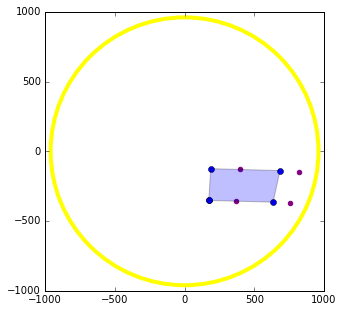

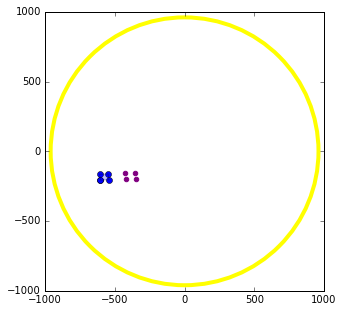

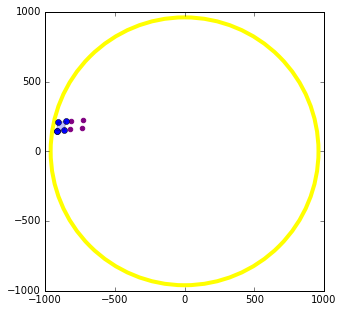

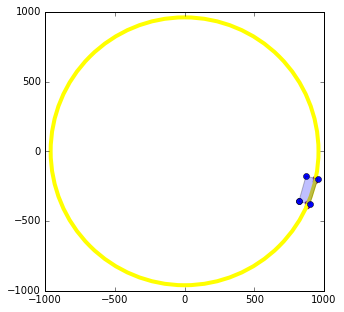

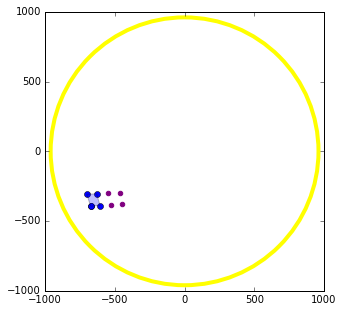

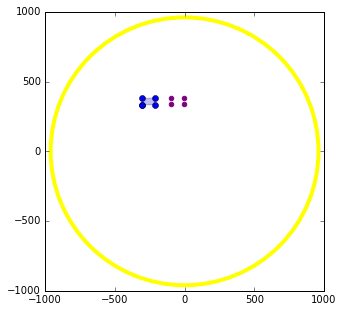

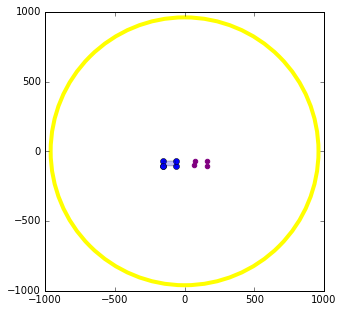

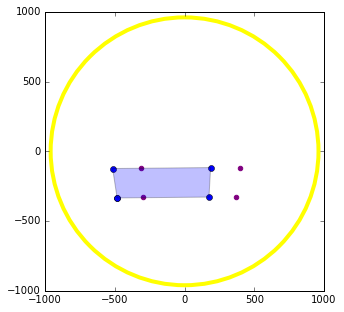

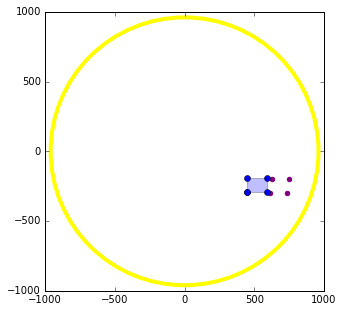

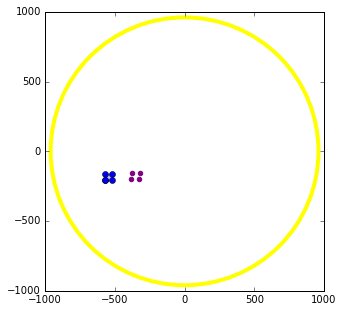

In [145]:
#visualize polygon given by HEK with polygon's centriod and HEK's mean coordinates
%matplotlib inline

import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import pandas as pd
import numpy as np
from shapely import wkt


inputFile = 'look_at_ar_data.csv'

cme_set = pd.read_csv(inputFile, delimiter = ',', header = 0)

cme_hpc_bbox = np.array(cme_set['hpc_bbox'])

def plot_coords(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, 'o', zorder=1)

for i in range(10):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    cme_poly = wkt.loads(cme_hpc_bbox[i])
    
    plot_coords(ax, cme_poly.exterior)
    poly_coords = list(cme_poly.exterior.coords)
    poly_coords = np.asarray(poly_coords[0:-1])

    patch = PolygonPatch(cme_poly, alpha=0.25, zorder=2)
    ax.add_patch(patch)
#     plt.scatter(cme_poly.centroid.x, cme_poly.centroid.y, color = 'red')
    a, b, c, d = rotate_polygon(cme_poly, '2014-01-01T00:00:00', '2014-01-02T00:00:00')
    
    #plt.scatter(cme_set['hpc_x'].values[i], cme_set['hpc_y'].values[i], color = 'green')
    circ=plt.Circle((0,0), radius=960, color='yellow', fill=False, lw = 4)
    ax.add_patch(circ)
    plt.xlim((-1000, 1000))
    plt.ylim((-1000, 1000))
    plt.scatter(c,d, color = 'purple')
    create_poly = rotate_ar(cme_poly, '2014-01-01T00:00:00', '2014-01-02T00:00:00')
#     plot_coords(ax, create_poly.exterior)
#     x = np.linspace(-20000,20000,50)
#     y = ((cme_poly.centroid.y-cme_set['hpc_y'].values[i])/(cme_poly.centroid.x-cme_set['hpc_x'].values[i])*
#          (x-cme_poly.centroid.x)+cme_poly.centroid.y)
#     plt.plot(x,y)
    #plt.scatter(x1, y1, color = 'black')
    '''learned that all flare events' polygons are rectangles. event_coords seems to be accurate. for ef,
    polygons are a more diverse set of quadrilaterals. event_coords seems to be unaccurate, only seems to
    fall within a tiny box surrounding the orgin--> use centroid'''

[0, 1, 2, 3]
258.851arcsec
[(173.7282, -352.209), (634.734, -364.6686), (683.892, -138.2658), (187.2012, -124.5468), (173.7282, -352.209)]
[[ 173.7282 -352.209 ]
 [ 634.734  -364.6686]
 [ 683.892  -138.2658]
 [ 187.2012 -124.5468]]
[ 173.7282 -352.209 ]
[(-603.036, -207.006), (-542.043, -204.6372), (-547.6758, -162.6222), (-609.3, -165.0252), (-603.036, -207.006)]
[[-603.036  -207.006 ]
 [-542.043  -204.6372]
 [-547.6758 -162.6222]
 [-609.3    -165.0252]]
[-603.036 -207.006]
[(-916.938, 147.8628), (-861.204, 154.8906), (-852.264, 214.1796), (-907.428, 207.1872), (-916.938, 147.8628)]
[[-916.938   147.8628]
 [-861.204   154.8906]
 [-852.264   214.1796]
 [-907.428   207.1872]]
[-916.938   147.8628]
[(818.832, -359.8524), (898.458, -377.6892), (954.606, -197.7042), (870.102, -178.4214), (818.832, -359.8524)]
[[ 818.832  -359.8524]
 [ 898.458  -377.6892]
 [ 954.606  -197.7042]
 [ 870.102  -178.4214]]
[ 818.832  -359.8524]
[(-673.752, -392.4426), (-606.06, -388.8408), (-630.276, -304.6776),

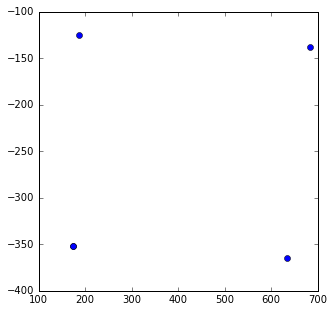

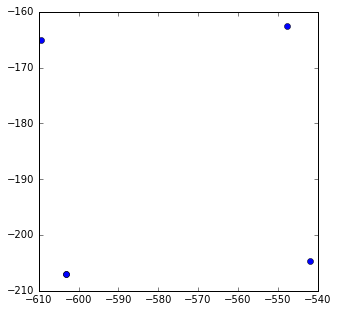

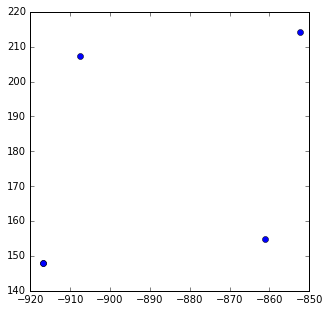

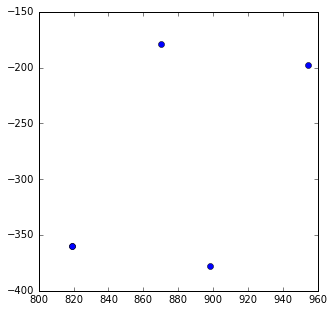

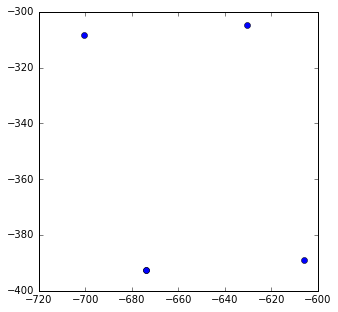

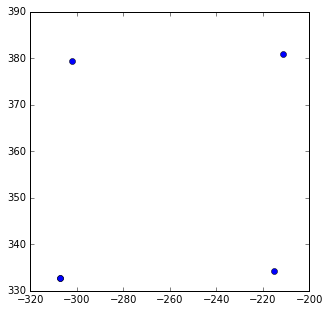

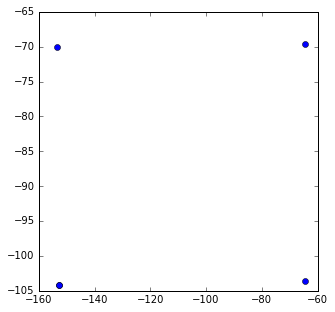

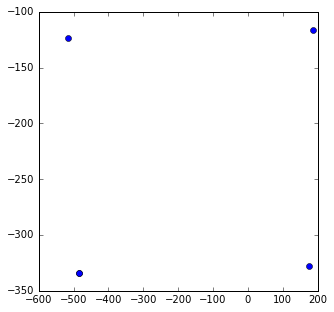

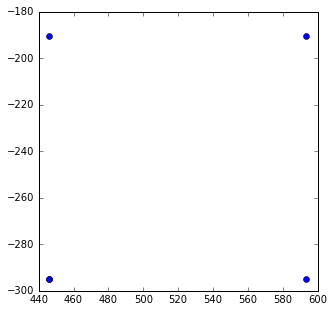

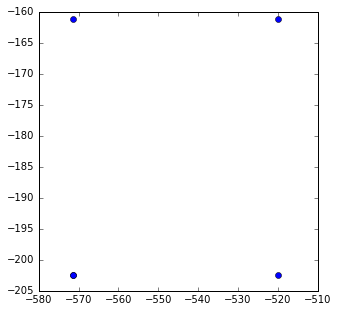

In [34]:
from sunpy.physics.differential_rotation import rot_hpc

from astropy import units as u
print range(4)

x = 34 * u.arcsec
y = 20 * u.arcsec

a1, a2 = rot_hpc(x, y, '2014-01-01T00:00:00', '2014-01-02T00:00:00')
print a1.value

import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import pandas as pd
import numpy as np
from shapely import wkt


inputFile = 'look_at_ar_data.csv'

cme_set = pd.read_csv(inputFile, delimiter = ',', header = 0)

cme_hpc_bbox = np.array(cme_set['hpc_bbox'])

def plot_coords(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, 'o', zorder=1)

for i in range(10):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    cme_poly = wkt.loads(cme_hpc_bbox[i])
    
    plot_coords(ax, cme_poly.exterior)
    poly_coords = list(cme_poly.exterior.coords)
    print poly_coords
    poly_coords = np.asarray(poly_coords[0:-1])
    a, b = rotate_ar(cme_poly, '2014-01-01T00:00:00', '2014-01-02T00:00:00')
    plt.plot(a,b, color = 'purple')


In [143]:
from sunpy.physics.differential_rotation import rot_hpc
from astropy import units as u
from shapely.geometry import Polygon
from shapely import wkt

cme_hpc_bbox = np.array(cme_set['hpc_bbox'])
cme_hpc_bbox = map(wkt.loads, cme_hpc_bbox)

def rotate_polygon(polygon, start_time, end_time):
    poly_coords = list(polygon.exterior.coords)
    poly_coords = (np.asarray(poly_coords[0:-1])) *u.arcsec
    poly_coords_x = poly_coords[:,0]
    poly_coords_y = poly_coords[:,1]
    rotated_poly_coords_x, rotated_poly_coords_y = rot_hpc(poly_coords_x, poly_coords_y, start_time, end_time)
    return poly_coords_x.value, poly_coords_y.value, rotated_poly_coords_x.value, rotated_poly_coords_y.value

#x, y = rotate_ar(cme_hpc_bbox[1], '2014-01-01T00:00:00', '2014-01-02T00:00:00')

def get_poly_coords(x, y, left_side = False):
    if left_side: diff = abs(y-y[x.argmin()])
    else: diff = abs(y-y[x.argmax()])
    d = {'x': x, 'y': y, 'diff':diff}
    sorter_df = pd.DataFrame(data=d)
    sorter_df = sorter_df.sort_values(by='x', ascending = left_side)
    x0 = sorter_df['x'].values[0]
    y0 = sorter_df['y'].values[0]
    if sorter_df['diff'].values[1] >= sorter_df['diff'].values[2]:
        x1 = sorter_df['x'].values[1]
        y1 = sorter_df['y'].values[1]
#         print 'if is the prob'
    else:
        x1 = sorter_df['x'].values[2]
        y1 = sorter_df['y'].values[2]
    return x0, y0, x1, y1

def rotate_ar(polygon, start_time, end_time):
    og_x, og_y, rot_x, rot_y = rotate_polygon(polygon, start_time, end_time)
    x0, y0, x1, y1 = get_poly_coords(og_x, og_y, True)
    x2, y2, x3, y3 = get_poly_coords(rot_x, rot_y, False)
    #ensure that vertices of quadrilateral are in counterwise order in order to create proper Polygon object
    if y0 < y1:
        dummy_y = y0
        dummy_x = x0
        y0 = y1
        x0 = x1
        y1 = dummy_y
        x1 = dummy_x
    if y2 > y3:
        dummy_y = y2
        dummy_x = x2
        y2 = y3
        x2 = x3
        y3 = dummy_y
        x3 = dummy_x
    rotated_ar_polygon = Polygon([(x0,y0), (x1,y1), (x2,y2), (x3,y3)])
    print rotated_ar_polygon
    return rotated_ar_polygon



starting second if
POLYGON ((870.102 -178.4214, 818.832 -359.8524, 934.7812268025046 -209.7342725761246, 937.0861372378612 -188.8267934468916, 870.102 -178.4214))


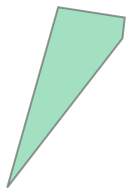

In [136]:
cme_hpc_bbox = np.array(cme_set['hpc_bbox'])
cme_hpc_bbox = map(wkt.loads, cme_hpc_bbox)

rotate_ar(cme_hpc_bbox[3], '2014-01-01T00:00:00', '2014-01-02T00:00:00')

In [ ]:
#create a shapely point object from the flare's mean coordinates
            #keep in mind, Point in HPC units 
            fl_point = Point((flare_set['hpc_x'].values[i], flare_set['hpc_y'].values[i]))
            #run this loop if temporal qualifications have limited ef_search to only one ef event
            if ef_search.shape[0] == 1:
                #create a shapely polygon object from ef's location
                ef_poly = wkt.loads(ef_search['ef_hpc_bbox'].values[0])
                #calculate the minimum 2D distance between the ef's polygon and the flare's mean coordinate
                chord = fl_point.distance(ef_poly)
                #calculate the minimum 3D distance along the sun's curved surface between the ef & flare events
                #assumes the same radius for all events
                s = r*np.arcsin(chord/(2*r))
                #determine whether the spatial distance between ef and flare meets the set parameter
                if s <= spatial_sep:
                    #have found an associated ef
                    #enter into the flare dataset information about its associated ef
                    flare_set['associated_ef'].values[i] = ef_search['ef_SOL_standard'].values[0]
                    for elem in ef_keywords:
                        flare_set.loc[idx[i], elem] = ef_search[elem].values[0]
                    #increase the number of associated ef events by 1
                    num_associated_ef+=1 
            #run this loop if temporal qualifications have limited ef_search to a list of possible ef
            #works in the same manner as the loop for a single event except each element of the list is
            #run through consecutively  
            else:
                ef_search['ef_hpc_bbox'] = unicode2polygon(ef_search['ef_hpc_bbox'])
                #create a dummy counter variable because python won't let me use enumerate on a datframe
                #column 
                j = 0
                #create an empty list to add found event indices to for later access
                listOindices = []
                for elem in ef_search['ef_hpc_bbox'].values:
                    chord = fl_point.distance(elem)
                    s = r*np.arcsin(chord/(2*r))
                    if s <= spatial_sep:
                        num_associated_ef+=1 
                        listOindices.append(j)
                    j+=1
                #run if we've found at least one associted ef event
                if num_associated_ef >= 1:
                    has_multiple_ef = 1
                    #write each associated event as a separate row entry
                    for index in listOindices:
                        #create a new row, copying the data in the original flare's row entry
                        new_row = flare_set.iloc[i, :]
                        #append the original flare's row index to the list of rows to be deleted 
                        to_be_deleted.append(idx[i])
                        #enter into the row information about the associated ef
                        new_row['associated_ef'] = ef_search['ef_SOL_standard'].values[index]
                        new_row['num_associated_ef'] = num_associated_ef
                        for elem in ef_keywords:
                            new_row[elem] = ef_search[elem].values[index]
                        #increase last index
                        idx_last +=1
                        #add a new row to the bottom of the dataframe
                        flare_set.loc[idx_last, :] = new_row
   